# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
spy_shares = 50
agg_shares = 200

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_data['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_data['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $36724.80
The current value of your 5.3 ETH is $9452.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-07-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    limit=1000,
).df

# Preview DataFrame
df_ticker.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-07-19 00:00:00-04:00  116.39  116.6085  116.35  116.52  6476334  426.19   

                                                                
                               high     low   close     volume  
time                                                            
2021-07-19 00:00:00-04:00  431.4089  421.97  424.97  127607115

In [14]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][0]
spy_close_price = df_ticker["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.52
Current SPY closing price: $424.97


In [15]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21248.50
The current value of your 200 AGG shares is $23304.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(data= {'amount': [crypto, shares]})
df_savings.index = ['crypto', 'shares']

# Display savings DataFrame
display(df_savings)

,amount
crypto,46177.085
shares,44552.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

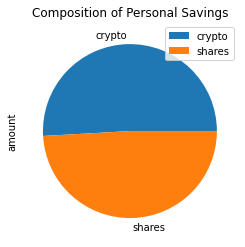

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title="Composition of Personal Savings")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congrats! You have achieved your financial goal")
elif total_savings < emergency_fund:
    print(f"You need ${emergency_fund - total_savings} more money in your emergency fund")

Congrats! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-07-01', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2017-07-13 00:00:00-04:00  109.29  109.3118  109.13  109.24  1432660  244.02   
2017-07-14 00:00:00-04:00  109.54  109.5600  109.29  109.36  1744770  244.42   
2017-07-17 00:00:00-04:00  109.40  109.4800  109.32  109.41  1910544  245.47   
2017-07-18 00:00:00-04:00  109.64  109.7100  109.58  109.68  2471170  245.06   
2017-07-19 00:00:00-04:00  109.72  109.7500  109.63  109.70  1405289  246.02   

                                                             
                             high     low   close    volume  
time                                                         
2017-07-13 00:00:00-04:00  244.55  243.76  244.41  29889284  
2017-07-14 00:00:00-04:00  245.97  244.31  245.54  40758038  
2017-07-17 00:00:00-04:00  245.91  245.33  245.51  22378971  
2017-07-18 00:00:00-04:00  245.72  244.67  245.69  31695494  
2017-07-19 00:00:00-04:00  247.00  246.01  246.99  31007738

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_data = MCSimulation(portfolio_data = df_stock_data, weights = [0.5,0.5], num_simulation = 500, num_trading_days = 252*30)

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010138,0.996031,0.998629,0.996985,1.000931,0.997439,0.994571,0.991795,0.997032,0.997437,...,1.009258,1.009212,1.001546,1.004325,0.997558,0.995442,1.000421,1.015056,1.007031,1.000604
2,1.006389,0.995496,1.006706,0.999001,1.000223,0.993644,0.991451,0.998974,1.011627,1.005584,...,1.005055,1.005162,1.003605,1.005041,0.991384,1.006827,0.990122,1.005092,1.012321,1.005123
3,1.029190,0.988019,0.996215,1.010909,0.990324,0.995468,1.009395,1.006580,1.013148,1.009441,...,0.999651,1.013938,0.986349,1.005466,0.979743,1.002444,0.997310,0.998435,1.022986,1.020437
4,1.036536,0.980011,0.991888,0.999415,0.983174,1.004860,1.007815,1.014255,1.018538,1.006574,...,0.994361,1.008001,0.983029,1.011711,0.979248,1.004171,1.004638,1.009937,1.015539,1.033476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.075221,27.812504,10.130408,12.285090,15.651715,7.963268,16.668425,10.533978,10.139263,16.389450,...,13.048135,5.709564,21.909048,25.821280,12.382372,18.056301,25.841465,12.350721,13.549723,27.813977
7557,9.995046,27.645377,10.215917,12.143631,15.553168,7.888671,16.722197,10.532653,10.089540,16.409521,...,13.012609,5.682733,21.897730,25.937307,12.196362,18.090889,25.704327,12.461421,13.501549,27.645546
7558,9.947266,27.874104,10.203582,12.115857,15.478334,7.925541,16.591643,10.468272,10.066213,16.520825,...,13.051247,5.659925,22.033160,25.799931,12.280395,18.078206,25.223211,12.576722,13.601955,27.704085
7559,9.899076,27.999386,10.174549,12.056701,15.486846,7.965894,16.607999,10.454136,10.118175,16.631628,...,13.144706,5.716108,22.142894,25.370861,12.313467,18.082473,25.153374,12.617537,13.700856,27.581069


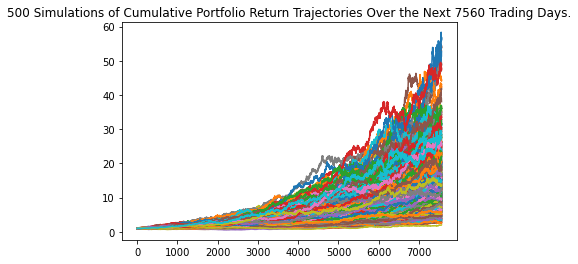

In [31]:
# Plot simulation outcomes
line_plot = retirement_data.plot_simulation()

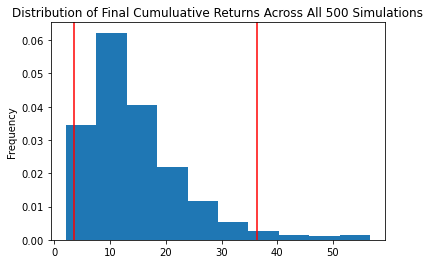

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = retirement_data.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = retirement_data.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean             14.582249
std               8.973028
min               2.041994
25%               8.237866
50%              12.365294
75%              18.375530
max              56.658163
95% CI Lower      3.549264
95% CI Upper     36.392196
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stats[8]*20000,2)
ci_upper = round(sum_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70985.28 and $727843.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stats[8]*30000,2)
ci_upper = round(sum_stats[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106477.92 and $1091765.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
retirement_data_5yrs = MCSimulation(portfolio_data = df_ticker_2, weights = [0.5,0.5], num_simulation = 500, num_trading_days = 252*5)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
retirement_data_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994737,0.996869,1.002940,1.006078,1.005842,1.006079,1.005691,1.009654,1.000376,1.008604,...,1.007208,1.002146,1.008128,0.994025,1.001101,0.995539,0.991825,1.004573,0.992931,1.006862
2,0.983613,0.992567,0.994245,1.011407,1.011866,1.000881,0.998965,1.004980,0.999160,1.009415,...,1.001190,1.004030,1.001671,0.992910,1.001712,0.997537,1.003019,1.018872,0.995411,1.007638
3,0.979433,0.991007,1.000078,1.009621,1.014672,1.009297,1.006115,1.005840,1.011168,1.026954,...,1.013092,1.009839,0.997154,0.999781,1.001707,0.989359,0.992502,1.024750,0.988879,1.005174
4,0.972662,1.001475,0.993553,1.000641,1.013567,1.005428,0.993114,1.007350,1.014752,1.036045,...,1.022605,1.004955,1.002087,0.994047,1.009471,0.993666,0.977288,1.024611,0.988352,1.001657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.356542,1.981673,2.370214,1.894069,2.079258,2.617196,1.072821,1.512944,1.249867,1.776640,...,1.055941,1.820967,1.760021,1.491756,1.580980,1.173056,1.769436,1.732801,1.394043,1.262894
1257,1.340211,1.966849,2.369611,1.891563,2.063364,2.610996,1.078700,1.514471,1.250182,1.771707,...,1.060976,1.839873,1.765603,1.504536,1.581958,1.183976,1.765846,1.710668,1.400170,1.266946
1258,1.342398,1.967672,2.367244,1.888475,2.043190,2.622552,1.094107,1.507636,1.262489,1.760927,...,1.063695,1.858510,1.766571,1.485841,1.594242,1.169750,1.766884,1.709587,1.402852,1.254386
1259,1.354393,1.963630,2.368559,1.893958,2.054504,2.604194,1.098116,1.519179,1.255332,1.731408,...,1.057012,1.849756,1.749465,1.468246,1.605737,1.166979,1.783051,1.724447,1.411525,1.246824


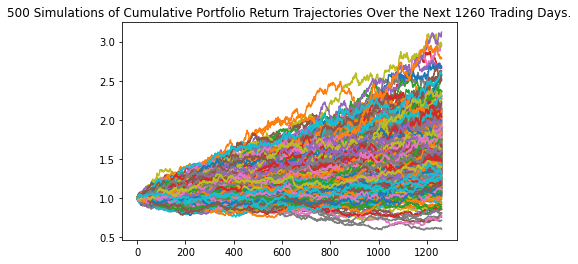

In [41]:
# Plot simulation outcomes
line_plot_2 = retirement_data_5yrs.plot_simulation()

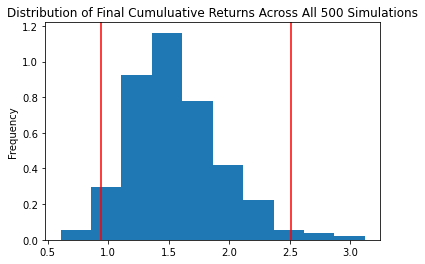

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_2 = retirement_data_5yrs.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_2 = retirement_data_5yrs.summarize_cumulative_return()

# Print summary statistics
print(sum_stats_2)

count           500.000000
mean              1.559530
std               0.385907
min               0.605551
25%               1.301262
50%               1.504035
75%               1.772091
max               3.119024
95% CI Lower      0.937627
95% CI Upper      2.508985
Name: 1260, dtype: float64


In [45]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stats_2[8]*initial_investment,2)
ci_upper_five = round(sum_stats_2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56257.6 and $150539.07


### Ten Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
retirement_data_10yrs= MCSimulation(portfolio_data = df_ticker_2, weights = [0.5,0.5], num_simulation = 500, num_trading_days = 252*10)


In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
retirement_data_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001317,0.998291,1.001609,1.004853,0.999868,1.009683,1.001194,0.989093,1.007707,0.992394,...,1.009233,0.994143,1.001916,1.002937,1.000309,0.999155,1.004468,0.993142,0.988359,1.002567
2,1.001628,1.007949,0.995686,1.011310,0.996051,1.013141,1.013952,0.995984,1.004256,1.000836,...,1.005797,0.998668,1.005332,1.008236,0.997521,0.979365,1.007968,0.988848,1.009268,1.013172
3,1.005026,1.002995,0.992010,1.006322,0.995904,1.019050,1.022651,0.999495,1.004103,1.009237,...,1.007632,0.996414,0.999797,1.006681,0.994035,0.985547,1.014931,0.990085,1.016493,1.020785
4,1.008443,1.001468,0.987676,1.015571,0.995881,1.017358,1.020614,1.006334,1.014010,1.001906,...,1.016154,1.002139,0.999812,1.005882,1.001423,0.988263,1.007520,0.998331,1.025212,1.022085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.767635,2.377170,2.033713,2.729229,1.951906,2.755743,1.702320,3.175295,2.355548,2.211582,...,3.085929,2.445466,2.381428,1.604450,3.554882,1.382684,1.891790,1.659232,3.714571,2.093331
2517,2.733259,2.380574,2.045969,2.713699,1.948706,2.755860,1.698928,3.163300,2.360981,2.209940,...,3.081937,2.436080,2.344817,1.605979,3.571373,1.383176,1.915658,1.648031,3.728538,2.101768
2518,2.725308,2.390103,2.039830,2.726544,1.969680,2.764297,1.690967,3.160650,2.365295,2.219301,...,3.097428,2.457755,2.355170,1.601899,3.566952,1.395413,1.895323,1.631980,3.777469,2.119480
2519,2.725788,2.399216,2.025059,2.737172,1.975883,2.788723,1.686297,3.171250,2.382388,2.225217,...,3.080045,2.467213,2.355223,1.590810,3.583904,1.393100,1.894479,1.603407,3.760762,2.106758


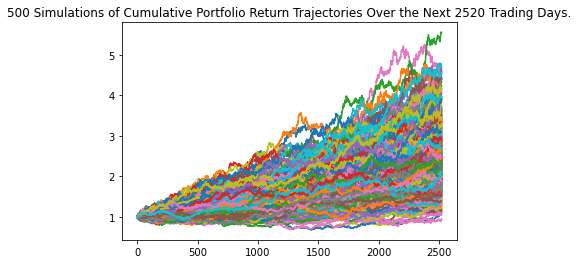

In [48]:
# Plot simulation outcomes
line_plot_3 = retirement_data_10yrs.plot_simulation()

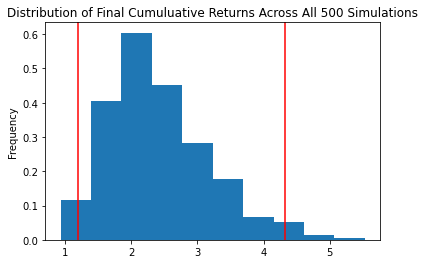

In [49]:
# Plot probability distribution and confidence intervals
dist_plot_3 = retirement_data_10yrs.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_3 = retirement_data_10yrs.summarize_cumulative_return()

# Print summary statistics
print(sum_stats_3)

count           500.000000
mean              2.399502
std               0.762529
min               0.932222
25%               1.876016
50%               2.272859
75%               2.823635
max               5.531966
95% CI Lower      1.203454
95% CI Upper      4.326086
Name: 2520, dtype: float64


In [51]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stats_3[8]*initial_investment,2)
ci_upper_ten = round(sum_stats_3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72207.23 and $259565.16
